# **📊 Churn - Prediction - EDA**

**Objetivo**: Analizar en profundidad el dataset de telecomunicaciones [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) para comprender la estructura de los datos, la distribución de las variables, la presencia de valores faltantes o duplicados, y posibles relaciones entre las características y la variable objetivo `Churn`.

El análisis exploratorio nos permitirá:
- Detectar problemas de calidad de datos.
- Entender la distribución de las variables.
- Identificar relaciones entre características y la variable objetivo.
- Guiar decisiones de preprocesamiento.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graphics Style
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar dataset
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

# Visualización rápida
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Inspección estructural del dataset

Objetivo: Revisar la calidad y tipología de los datos.

Incluye:
- Dimensiones
- Tipología de las características
- Valores faltantes y duplicados
- Distribución de la variable objetivo `Churn`

In [4]:
# Dimesiones
df.shape

(7043, 21)

In [5]:
# Información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Recuento de NaN
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Recuento de duplicados
df.duplicated().sum()

np.int64(0)

In [8]:
# Convertir TotalCharges a numérico
# Pandas detecta TotalChanges como object - Contendrá espacios/strings - Generarán NaN al ser convertidos
# Serán tratados en preprocessing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Identificar tipo de variables
exclude_col = ['customerID']

continuous_cols = []
discrete_cols = []
categorical_cols = []
binary_cols = []

for col in df.columns:
    if col in exclude_col:
        continue
    
    nunique = df[col].nunique()
    dtype = df[col].dtype
    
    if nunique == 2:
        binary_cols.append(col)
    elif dtype == 'object' or (dtype in ['int64','float64'] and nunique < 10):
        categorical_cols.append(col)
    elif dtype in ['int64','float64'] and 10 < nunique <= 20:
        discrete_cols.append(col)
    elif dtype in ['int64','float64'] and nunique > 20:
        continuous_cols.append(col)

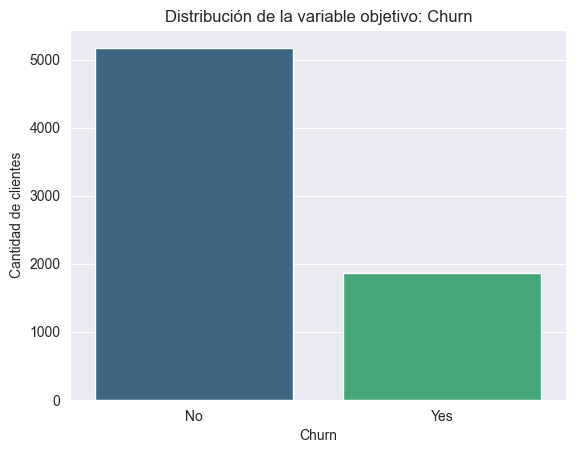

In [9]:
# Distibución variable objetivo

sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribución de la variable objetivo: Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

## Revisión de variables numéricas

En esta sección analizaremos las variables numéricas del dataset.

Incluye: 
- Resumen estadístico
- Distribuciones
- Boxplots y KDE frente a la variable objetivo, para identificar posibles outliers, así como patrones y diferencias entre clases

In [10]:
# Resumen estadístico
df[continuous_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


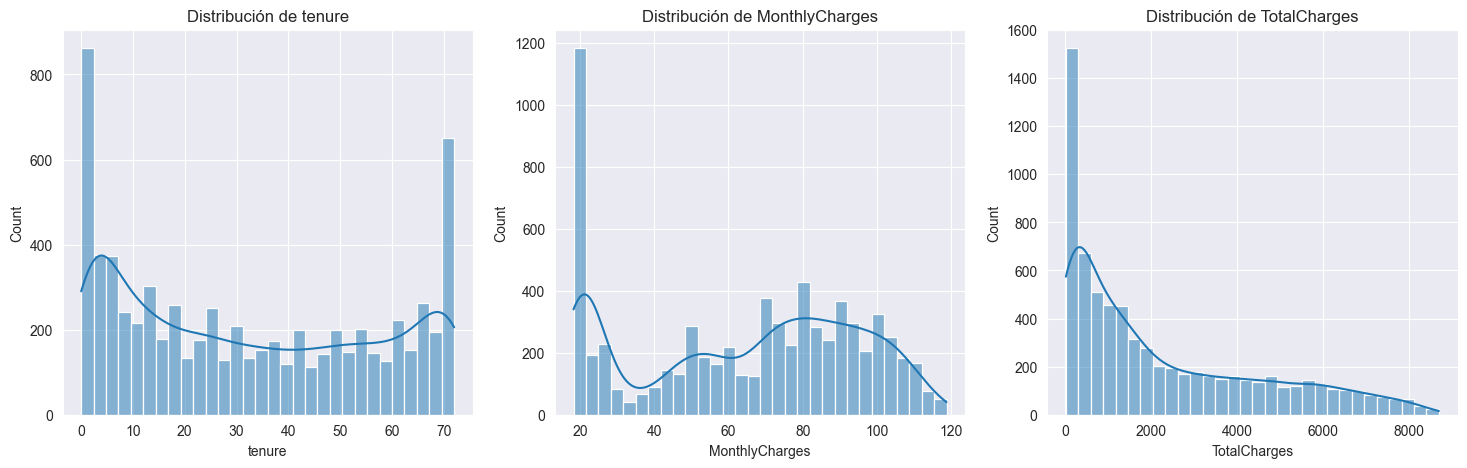

In [11]:
# Distribución de variables numéricas

plt.figure(figsize=(18,5))
for i, col in enumerate(continuous_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
plt.show()

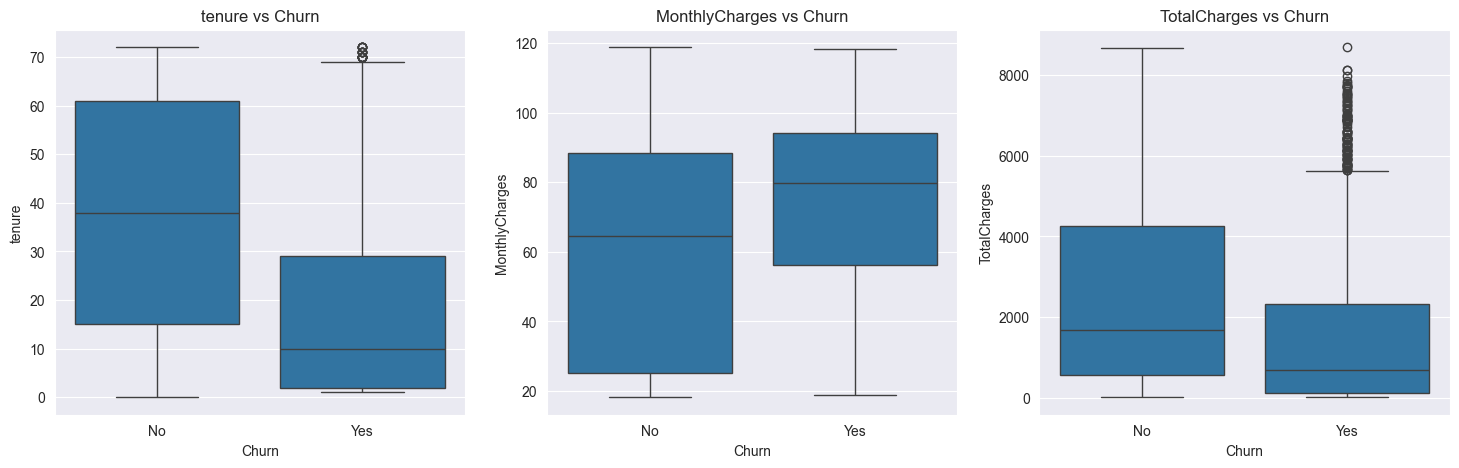

In [12]:
# Boxplots de variables numéricas según churn
plt.figure(figsize=(18,5))
for i, col in enumerate(continuous_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
plt.show()

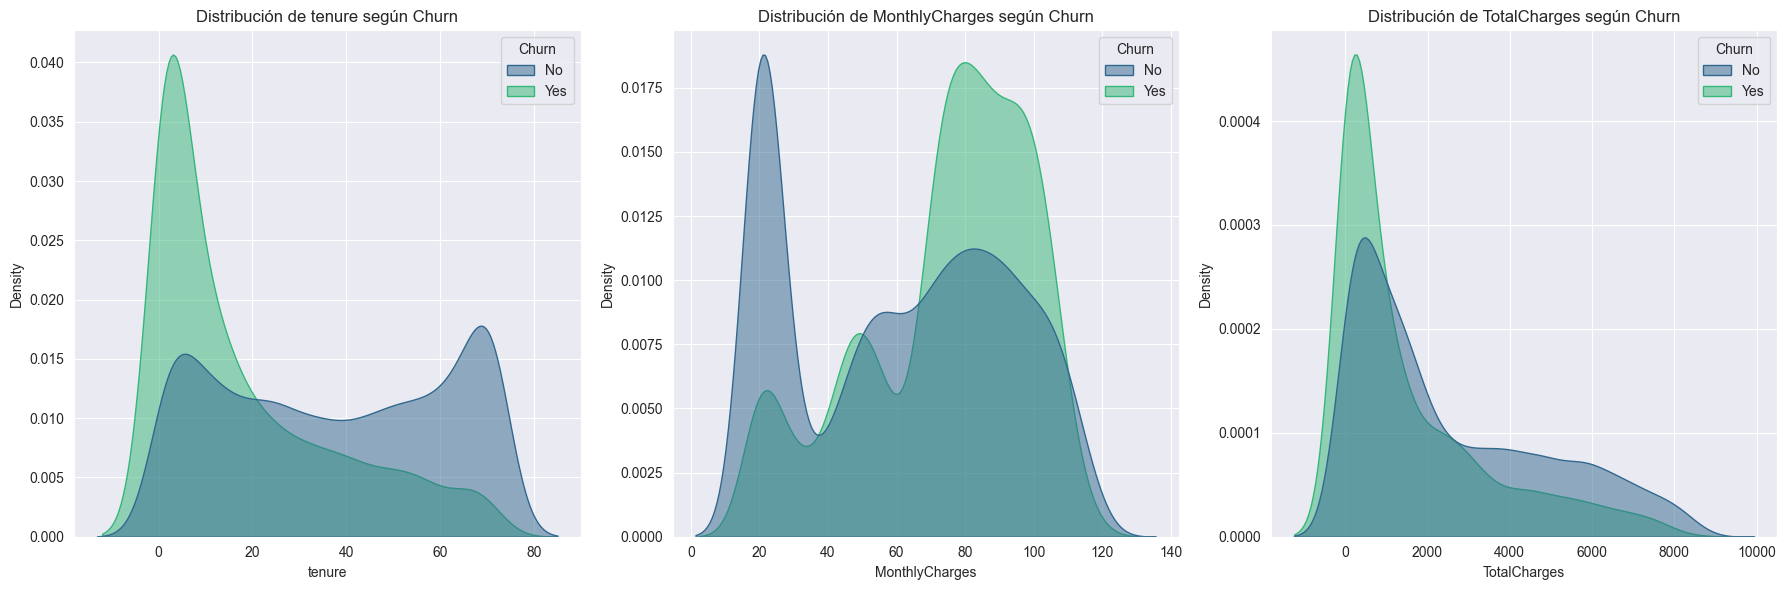

In [13]:
# Distribución variables numéricas según churn
plt.figure(figsize=(18,6))
for i, col in enumerate(continuous_cols):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(
        data=df,
        x=col,
        hue='Churn',
        fill=True,
        common_norm=False,
        alpha=0.5,
        palette='viridis'
    )
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel(col)
plt.tight_layout()
plt.show()


## Revisión de variables categóricas

En esta sección analizamos las variables categóricas para entender su distribución y relación con la variable objetivo `Churn`.

Incluye:
- Proporciones de cada categoría
- Distribuciones según *Churn*

In [14]:
categoricals = binary_cols + categorical_cols 

# Excluir churn
categoricals = [col for col in categoricals if col != 'Churn']

In [15]:
# Proporciones
for col in categoricals:
    print(f"{'-'*40}")
    print(f"Columna: {col}")
    display(df[col].value_counts(normalize=True))

----------------------------------------
Columna: gender


gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

----------------------------------------
Columna: SeniorCitizen


SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64

----------------------------------------
Columna: Partner


Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

----------------------------------------
Columna: Dependents


Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64

----------------------------------------
Columna: PhoneService


PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64

----------------------------------------
Columna: PaperlessBilling


PaperlessBilling
Yes    0.592219
No     0.407781
Name: proportion, dtype: float64

----------------------------------------
Columna: MultipleLines


MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64

----------------------------------------
Columna: InternetService


InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64

----------------------------------------
Columna: OnlineSecurity


OnlineSecurity
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: proportion, dtype: float64

----------------------------------------
Columna: OnlineBackup


OnlineBackup
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: proportion, dtype: float64

----------------------------------------
Columna: DeviceProtection


DeviceProtection
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: proportion, dtype: float64

----------------------------------------
Columna: TechSupport


TechSupport
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: proportion, dtype: float64

----------------------------------------
Columna: StreamingTV


StreamingTV
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: proportion, dtype: float64

----------------------------------------
Columna: StreamingMovies


StreamingMovies
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: proportion, dtype: float64

----------------------------------------
Columna: Contract


Contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64

----------------------------------------
Columna: PaymentMethod


PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

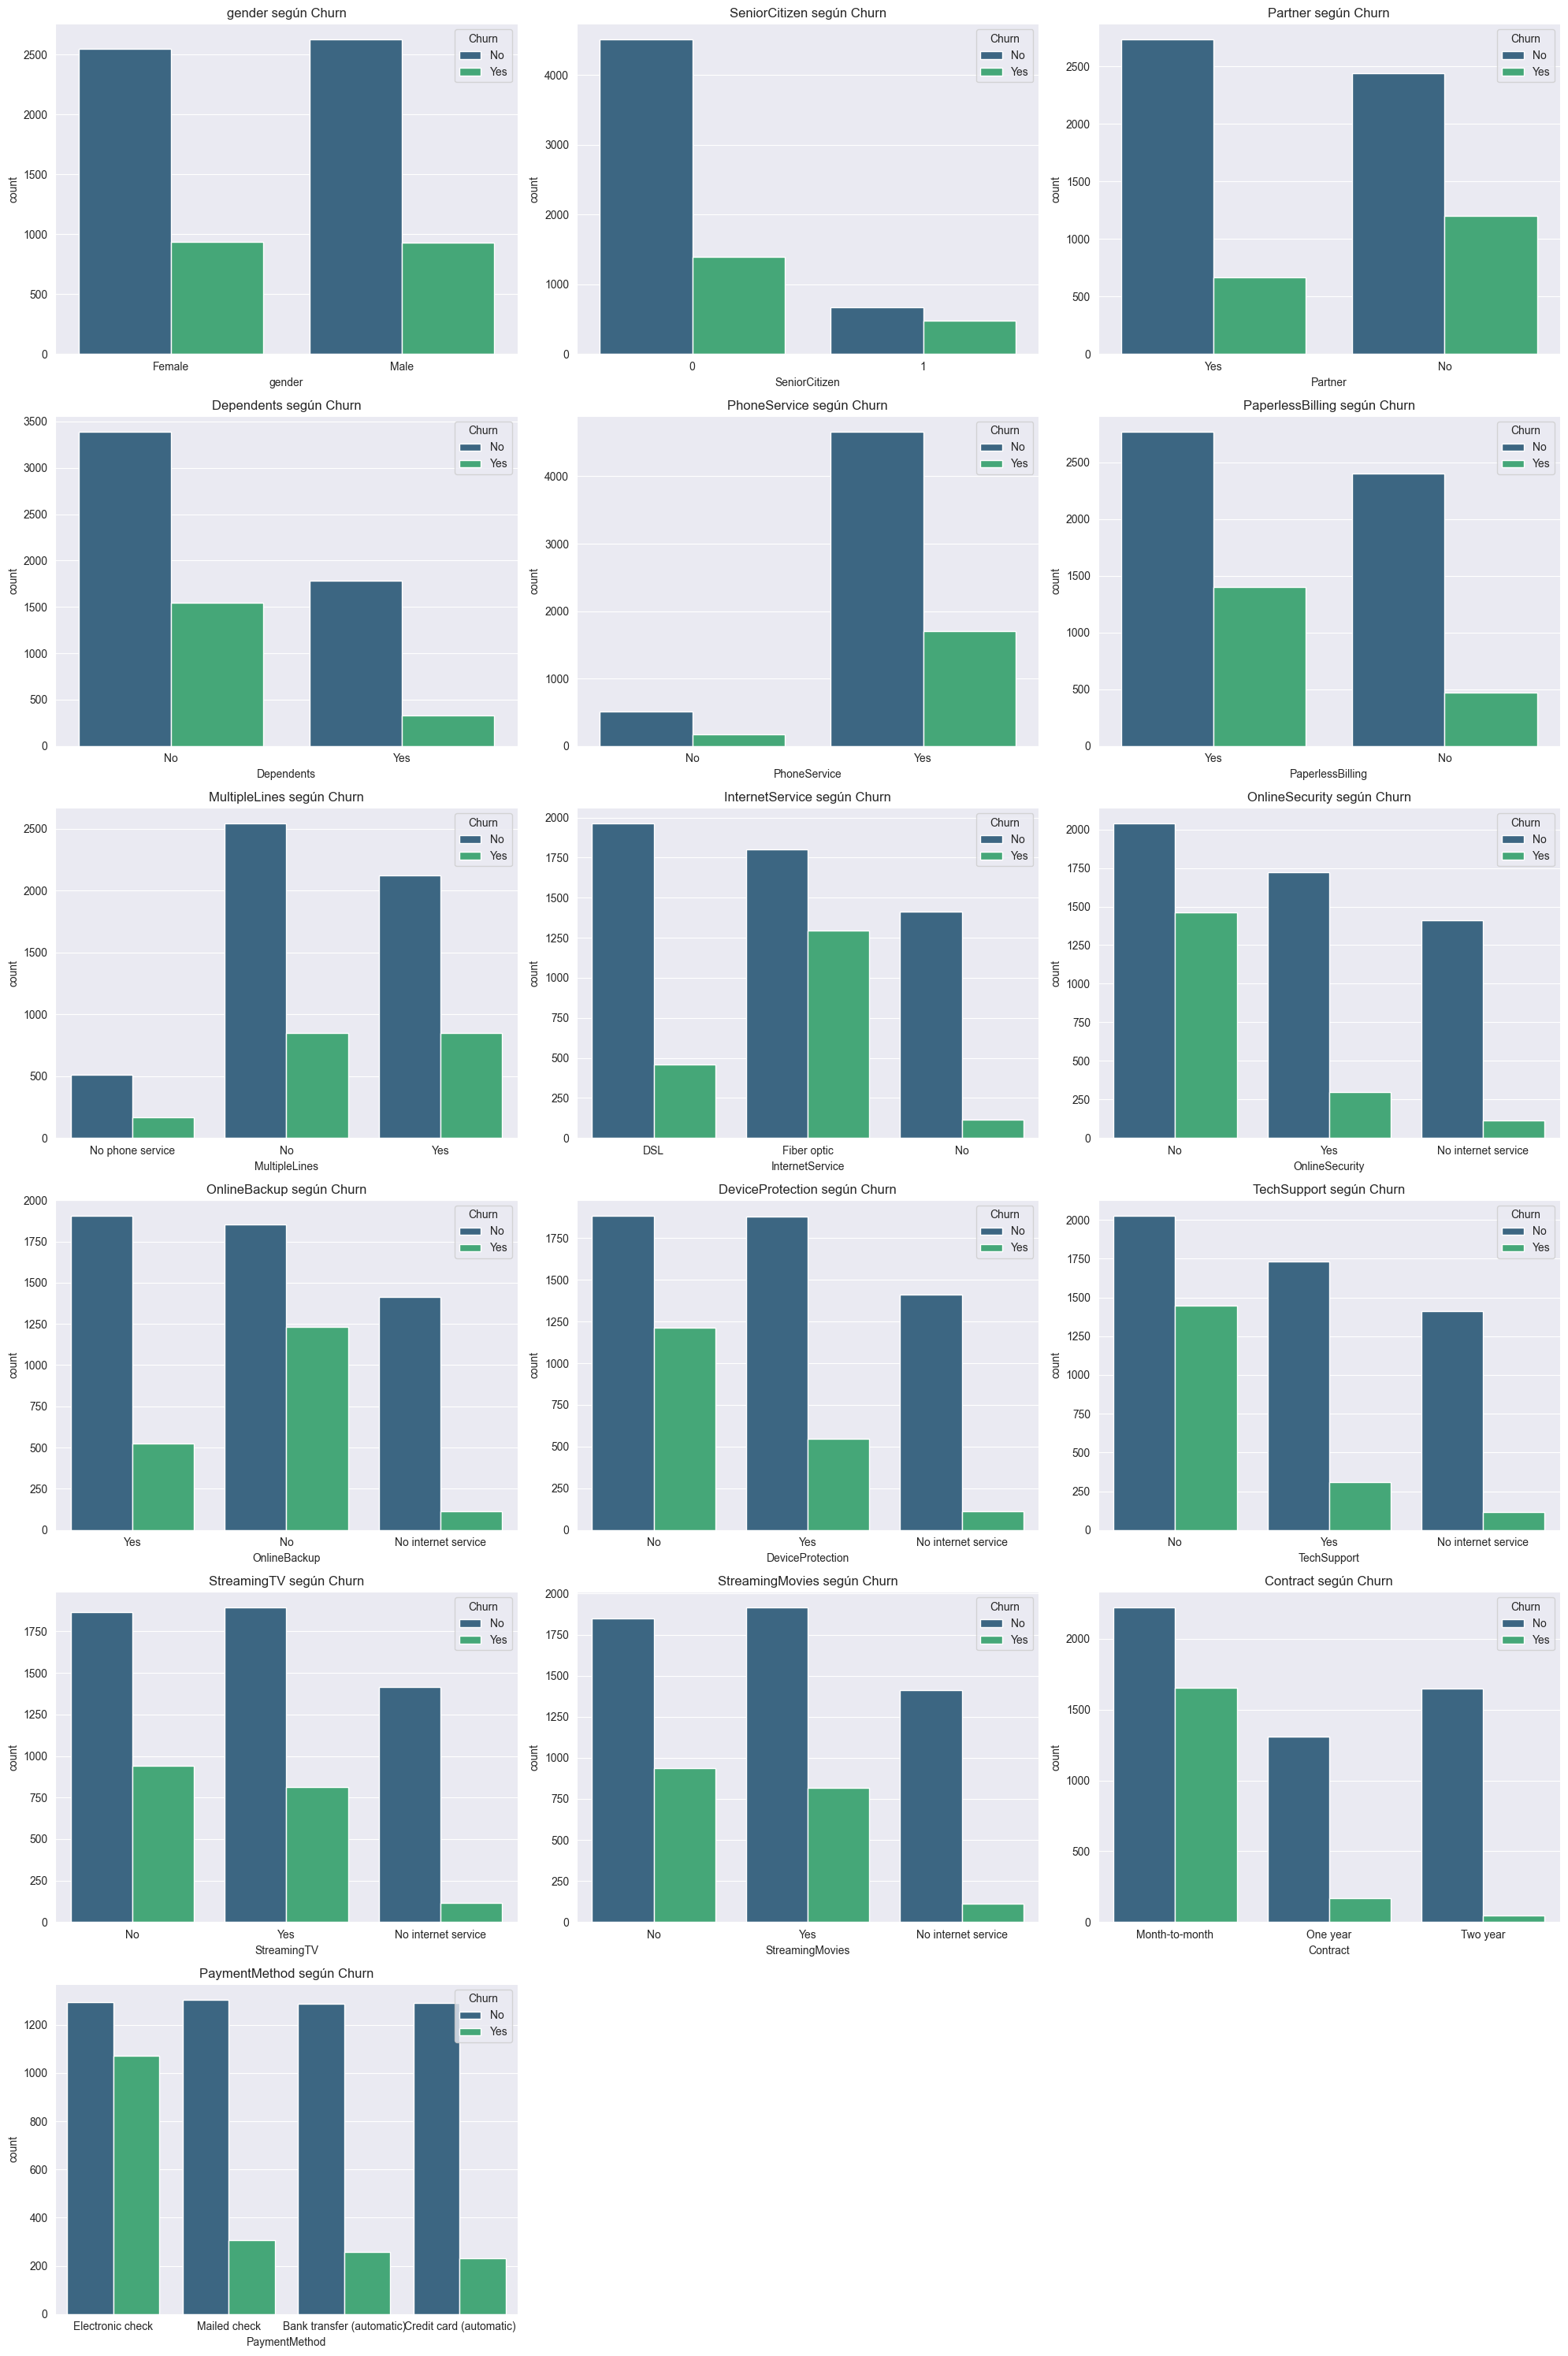

In [16]:
# Distribución 
plt.figure(figsize=(20,30))
for i, col in enumerate(categoricals):
    plt.subplot(6, 3, i+1)
    sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
    plt.title(f"{col} según Churn")
plt.tight_layout()
plt.show

## Correlación entre variables

Analizamos la correlación entre las variables numéricas y la variable objetivo `Churn`.

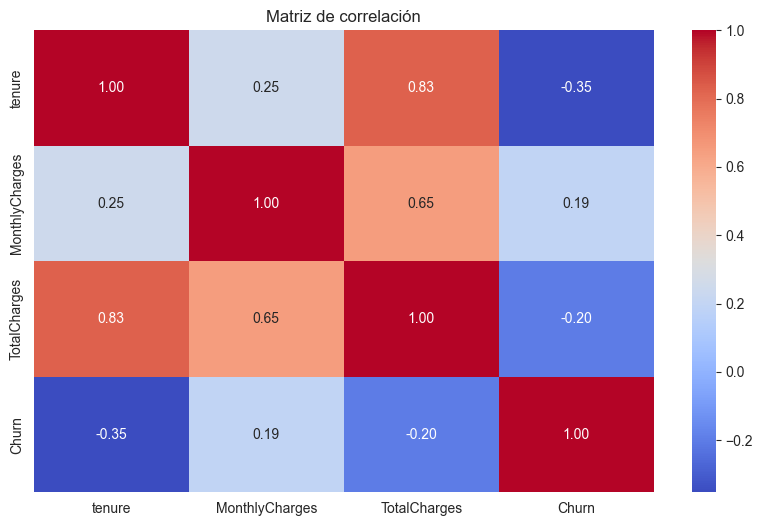

In [17]:
# Correlación
corr = df[continuous_cols + ['Churn']].copy()
corr['Churn'] = df['Churn'].map({'No':0, 'Yes':1})
plt.figure(figsize=(10,6))
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

## 💡 Insights preliminares

1. `Contract`: Los contratos `Month-to-month` (corto plazo) presentan mayor *churn*.
2. `Tenure`: *Churn* más frequente en clientes nuevos.
3. `PaymentMethod`: Los pagos mediante `ElectronicCheck` presentan mayor *churn*.
4. Servicios: Clientes sin `TechSupport`, `DeviceProtection`, `OnlineBackup` o `OnlineSecurity` presentan mayor *churn*.
5. `MonthlyCharges`: *Churn* más frequente en clientes con alta carga.

- **Perfil máximo riesgo**: Cliente nuevo, con contrato mensual de alta carga, sin servicios adicionales, y pago mediante `ElectronicCheck`.